<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Edgar Machuca Buenrostro (Creador del repositorio) https://github.com/Edgarmabu/ProyectoConjunto_EMachuca_PDiaz y Patricio Díaz

**Fecha:** 5 de marzo del 2020.

**Expediente** : 715089.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Transformada Inversa

## Enunciados

### 1

>Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

>Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

### 2
>Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
>$$f(x)=30(x^2-2x^3+x^4)$$
>Responda los siguientes literales:
>1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
>2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
>3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
>4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:

![imagen.png](attachment:imagen.png)
>5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:

![imagen.png](attachment:imagen.png)
>6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir
> 7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
>$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [1]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %matplotlib notebook
%matplotlib inline

#### 1

In [2]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

El máximo de f es: [1.875]


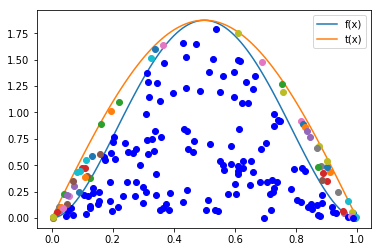

In [3]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t
t = lambda x: max_f*np.sin(np.pi*x)
x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 200 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

In [4]:
max_f

array([1.875])

#### 2

$t(x)=1.875\sin(\pi x)$

$c=\int_{-\infty}^{\infty}t(x)$

$g(x)= \frac{t(x)}{c}$

$$g(x)= \frac{1.875\sin(\pi x)}{1.875\int_{-\infty}^{\infty}\sin(\pi x)} =$$

$$ \frac{\sin(\pi x)}{\int_{-\infty}^{\infty}\sin(\pi x)}$$

Si lo dejamos de ${-\infty}$ a ${\infty}$ diverge. Sin embargo, si lo acotamos de 0 a 1 (como en la gráfica) obtenemos:

$$ \frac{\sin(\pi x)}{\int_{0}^{1}\sin(\pi x)} =$$

$$ \frac{\sin(\pi x)}{\frac{3.75}{\pi}} =$$

<font color=red> $$g(x)= \frac{\pi\sin(\pi x)}{3.75}$$ </font>

#### 3

In [5]:
def gx(N):
    return np.arcsin(1.19366*np.random.random(N))/np.pi

In [6]:
N = 10**4 
y= np.arange(0,N,0.01)
deriv= 2.6318*np.cos(np.pi*y)
x2 = gx(N)
x2 = x2[~np.isnan(x2)]

/Users/edgarmabu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arcsin
  


0.18203552229841646


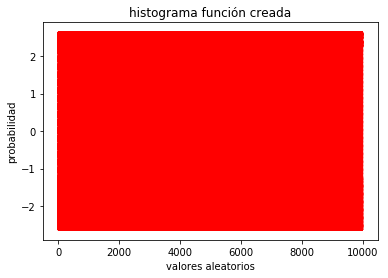

In [8]:
plt.plot(y,deriv, 'r--')
#plt.hist(x2,bins=100,density=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función creada')
print(np.mean(x2))

plt.show()